# The perceptron algorithm.
This notebook works as a short and simple illustration of the perceptron algorithm. It is a very simple linear model, on it's own it does not have much practical use, but it can be used to build to more complex models such as neural networks. 

## The problem 
We are going to use the perceptron to solve a binary-classification problem, in which we are given a data point belonging to one of two groups. Our goal is to identify which one based on a training set. 

## The data

In [18]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## The data
We need data that is split into two groups based on some rule/fact. 
For this task we are going to be generating our own data in 2 dimensions. 
The perceptron model is a linear model with no margins, this means that the data must be linear separable. To make it easy for us to verify that we our algorithm works we are simply going to use a linear rule.  

We are then going to make our own rule that says that: 
$$
y(x_1, x_2) =
    \begin{cases}
        1 \text{ if } a x_1 +b \leq x_2,\\
        -1 \text{ else}
    \end{cases}
$$
We are going to use numpy to generate $100$ data points of the form $x_1, x_2$ between $-50$ and $50$. To generate the labels we simply add the two dimensions and check when they are below 10. 

After the data has been generated we plot it

In [19]:
def generateData(nr_samples=100, max_val = 50, a=1, b=0):
    x = pd.DataFrame(
        np.random.rand(nr_samples, 2) * max_val * 2 - max_val, 
        columns=['x_1', 'x_2']
    )
    x['b'] = 1
    y = (x['x_1'] * a + b < x['x_2']).astype(int)
    return x, y.replace(0, -1)
    
    
x_train, y_train = generateData(nr_samples=100, max_val=50, a=1000, b=0)

In [20]:
def generateData(nr_samples=100, max_val = 50, a=1, b=0):
    x = pd.DataFrame(
        np.random.rand(nr_samples, 2) * max_val * 2 - max_val, 
        columns=['x_1', 'x_2']
    )
    x['b'] = 1
    y = (x['x_1']  < 0).astype(int)
    return x, y.replace(0, -1)
    
    
x_train, y_train = generateData(nr_samples=100, max_val=50, a=1000, b=0)

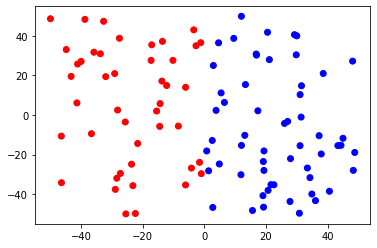

In [21]:
plt.scatter(
    x=x_train['x_1'], 
    y=x_train['x_2'], 
    c=[('red' if label == 1 else 'blue') for label in y_train],
)

## The algorithm 
As we see above there is some line between the two classes. This line could can be specified in the form 
$$
    \begin{array}
        ww_1 \\
        w_2 \\
        b\\
    \end{array}
$$. 



In [33]:
def plotLine(w, limit=50):
    plt.clf()
    tmp = pd.Series(w, index=['w_1', 'w_2', 'b'])
    slope = -(tmp.b / tmp.w_2) / (tmp.b / tmp.w_1)
    getY = lambda x: (-(tmp.w_1 * x) - tmp.b) / tmp.w_2
    xs = [-50, 50]
    ys = [getY(x) for x in [-50, 50]]
    print(f"boudaries were: {list(zip(xs,ys))}")
    plt.scatter(
        x=x_train['x_1'], 
        y=x_train['x_2'], 
        c=[('red' if label == 1 else 'blue') for label in y_train],
    )
    plt.ylim(x_train['x_2'].max())
    plt.plot(xs, ys, color='orange')

In [34]:
def classify(x,w):
    return np.sign(np.dot(x,w))


def update(w, x, y): 
    return (w + (x *  y)).values

In [35]:
w = np.random.rand(3) * 100 - 50
w[2] = 3.1337
w

array([ -1.42290362, -19.08792803,   3.1337    ])

Got 80 right! 
error was: 96
W was: [-337.27086511 -639.25595533   -0.8663    ]
boudaries were: [(-50, 26.37859970641674), (50, -26.38131004487436)]


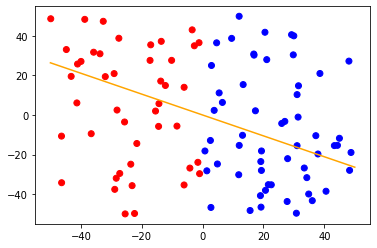

In [25]:
preds = pd.DataFrame(np.sign(np.dot(x_train, w)))[0]
wrong = preds[preds != y_train]
for error in list(wrong.index):
    w = update(w, x_train.loc[error], y_train.loc[error])
print(f'Got {len(preds) - len(wrong)} right! ')
print(f'error was: {error}')
print(f'W was: {w}')
plotLine(w)

Got 100 right! 
In 8 iterations 
boudaries were: [(-50, -2936.5190288400977), (50, 2936.659720374732)]


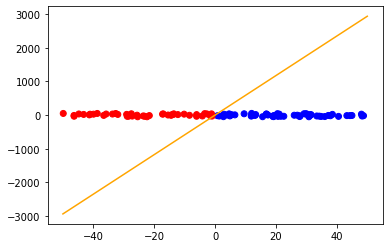

In [26]:
i = 1
while (len(wrong) > 0):
    i += 1
    preds = pd.DataFrame(np.sign(np.dot(x_train, w)))[0]
    wrong = preds[preds != y_train]
    for error in list(wrong.index):
        w = update(w, x_train.loc[error], y_train.loc[error])
print(f'Got {len(preds) - len(wrong)} right! ')
print(f'In {i} iterations ')
plotLine(w)

In [9]:
w

array([-1950.09598547,  -407.08545174,    -3.8663    ])

In [27]:
preds = pd.DataFrame(np.sign(np.dot(x_train, w)))[0]
wrong = preds[preds != y_train]
for error in list(wrong.index):
    w = update(w, x_train.loc[error], y_train.loc[error])
print(f'Got {len(preds) - len(wrong)} right! ')
print(f'error was: {error}')
print(f'W was: {w}')

Got 100 right! 
error was: 64
W was: [-1558.17669174    26.53038088    -1.8663    ]


Got 100 right! 
boudaries were: [(-50, -2936.5190288400977), (50, 2936.6597203747324)]


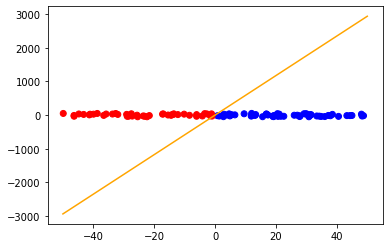

In [32]:
print(f'Got {len(preds) - len(wrong)} right! ')
plotLine([x/1000 for x in w])

In [14]:
preds = pd.DataFrame(np.sign(np.dot(x_train, w)))[0]
wrong = preds[preds != y_train]

In [15]:
wrong

43    1.0
Name: 0, dtype: float64